In [100]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates

import requests
import json
from pathlib import Path

import time
from datetime import datetime
import datetime

import sys

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

#from patsy import dmatrices

In [2]:
%matplotlib inline

## Function to convert day number to day

In [3]:
def convert_day(num):
    if num == 1:
        return 'Monday'
    elif num == 2:
        return 'Tuesday'
    elif num == 3:
        return 'Wednesday'
    elif num == 4:
        return 'Thursday'
    elif num == 5:
        return 'Friday'
    elif num == 6:
        return 'Saturday'
    else:
        return 'Sunday'

## Function to convert Month number to Month

In [4]:
def convert_month(num):
    if num == 1:
        return 'January'
    elif num == 2:
        return 'February'
    elif num == 3:
        return 'March'
    elif num == 4:
        return 'April'
    elif num == 5:
        return 'May'
    elif num == 6:
        return 'June'
    elif num == 7:
        return 'July'
    elif num == 8:
        return 'August'
    elif num == 9:
        return 'September'
    elif num == 10:
        return 'October'
    elif num == 11:
        return 'November'
    else:
        return 'December'

In [5]:
#path to files
file_path_csv_weather = Path('C:\\Users\\corma\\Documents\\GitHub\\Dublin-Bikes-Helper\\MachineLearn_DBH\\weather_info.csv')
file_path_csv_bike = Path('C:\\Users\\corma\\Documents\\GitHub\\Dublin-Bikes-Helper\\MachineLearn_DBH\\bike_info.csv')

In [6]:
#Read files
df = pd.read_csv(file_path_csv_bike,index_col=False)
dfw = pd.read_csv(file_path_csv_weather,index_col=False)

In [7]:
df.shape

(723761, 12)

In [8]:
df.describe()

,#,number,bike_stand,bike_stand_available,bike_available,delete_flag
count,723761.000000,723761.00000,723761.000000,723761.000000,723761.000000,723761.0
mean,361881.000000,60.29152,31.881045,19.783879,11.726846,0.0
std,208931.948427,42.60704,7.652676,11.036811,9.627315,0.0
min,1.000000,1.00000,1.000000,0.000000,0.000000,0.0
25%,180941.000000,29.00000,29.000000,11.000000,4.000000,0.0
50%,361881.000000,59.00000,30.000000,20.000000,10.000000,0.0
75%,542821.000000,89.00000,40.000000,28.000000,18.000000,0.0
max,723761.000000,507.00000,40.000000,40.000000,40.000000,0.0


In [9]:
df.dtypes

#                        int64
id                      object
number                   int64
name                    object
address                 object
bike_stand               int64
bike_stand_available     int64
bike_available           int64
status                  object
last_update             object
creat_time              object
delete_flag              int64
dtype: object

In [10]:
dfw.shape

(1061, 13)

In [11]:
dfw.head(5)

,id,coord_lon,coord_lat,weather_id,weather_main,temp,temp_feel,wind_speed,clouds,sunrise,sunset,creat_time,delete_flag
0,001ebb9ce45a4f1b,-6.2603,53.3498,803,Clouds,284.19,283.62,9.77,75,13/03/2023 06:45,13/03/2023 18:23,13/03/2023 08:58,0
1,009eee6775ff4686,-6.2603,53.3498,500,Rain,275.93,273.87,2.06,75,15/03/2023 06:40,15/03/2023 18:27,15/03/2023 06:28,0
2,011b142a8a724f84,-6.2603,53.3498,803,Clouds,281.86,278.37,7.20,75,12/03/2023 06:47,12/03/2023 18:22,12/03/2023 06:27,0
3,01bf5ed993ff4c9e,-6.2603,53.3498,803,Clouds,279.99,276.73,5.14,75,06/03/2023 07:02,06/03/2023 18:10,06/03/2023 12:26,0
4,01c9a739678f4098,-6.2603,53.3498,500,Rain,282.58,279.97,5.14,75,19/03/2023 06:30,19/03/2023 18:34,19/03/2023 12:59,0


In [12]:
dfw.describe()

,coord_lon,coord_lat,weather_id,temp,temp_feel,wind_speed,clouds,delete_flag
count,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.0
mean,-6.260217,53.349538,726.601320,280.417342,277.726899,6.124109,64.741753,0.0
std,0.001164,0.001256,139.169302,3.817646,5.169737,2.659865,20.545055,0.0
min,-6.264900,53.345300,300.000000,272.420000,267.380000,1.030000,0.000000,0.0
25%,-6.260300,53.349800,800.000000,277.280000,273.350000,4.120000,75.000000,0.0
50%,-6.260300,53.349800,803.000000,280.130000,277.010000,6.170000,75.000000,0.0
75%,-6.260300,53.349800,803.000000,283.770000,282.990000,8.230000,75.000000,0.0
max,-6.255000,53.354500,803.000000,289.070000,288.550000,13.890000,100.000000,0.0


In [13]:
dfw.dtypes

id               object
coord_lon       float64
coord_lat       float64
weather_id        int64
weather_main     object
temp            float64
temp_feel       float64
wind_speed      float64
clouds            int64
sunrise          object
sunset           object
creat_time       object
delete_flag       int64
dtype: object

In [14]:
dfw['weather_main'].unique()

array(['Clouds', 'Rain', 'Snow', 'Clear', 'Drizzle'], dtype=object)

## Set up Time Parmeters - Bike and Weather

In [15]:
df["TIME"] = pd.to_datetime(df["creat_time"],format='%d/%m/%Y %H:%M')
df["YEAR"] = df["TIME"].dt.year
df["MONTH"] = df["TIME"].dt.month
df['Day_of_Week'] = df['TIME'].dt.dayofweek
df["DAY_num"] = df["TIME"].dt.day
df["HOUR"] = df["TIME"].dt.hour
df["MINUTE"] = df["TIME"].dt.minute

df['DAY_num_HOUR'] = df['DAY_num'] + df['HOUR']
df['DAY_num_HOUR'].head()

In [16]:
df.dtypes

#                                int64
id                              object
number                           int64
name                            object
address                         object
bike_stand                       int64
bike_stand_available             int64
bike_available                   int64
status                          object
last_update                     object
creat_time                      object
delete_flag                      int64
TIME                    datetime64[ns]
YEAR                             int64
MONTH                            int64
Day_of_Week                      int64
DAY_num                          int64
HOUR                             int64
MINUTE                           int64
dtype: object

In [17]:
dfw["TIME"] = pd.to_datetime(dfw["creat_time"],format='%d/%m/%Y %H:%M')
dfw["sunrise"] = pd.to_datetime(dfw["sunrise"],format='%d/%m/%Y %H:%M')
dfw["sunset"] = pd.to_datetime(dfw["sunset"],format='%d/%m/%Y %H:%M')

dfw["YEAR"] = dfw["TIME"].dt.year
col =np.array(dfw["YEAR"],np.int64) #Converts float to int
dfw["YEAR"] = col #Converts float to int

dfw["MONTH"] = dfw["TIME"].dt.month
col =np.array(dfw["MONTH"] ,np.int64)
dfw["MONTH"]  = col

dfw['Day_of_Week'] = dfw['TIME'].dt.dayofweek
col =np.array(dfw['Day_of_Week'],np.int64) 
dfw['Day_of_Week'] = col 
dfw["DAY_num"] = dfw["TIME"].dt.day
col =np.array(dfw["DAY_num"],np.int64)
dfw["DAY_num"] = col

dfw["HOUR"] = dfw["TIME"].dt.hour
col =np.array(dfw["HOUR"] ,np.int64)
dfw["HOUR"]  = col

dfw["MINUTE"] = dfw["TIME"].dt.minute
col =np.array(dfw["MINUTE"] ,np.int64)
dfw["MINUTE"] = col

dfw['YEAR_MONTH_DAY_num_HOUR'] = df['YEAR'] + df['MONTH'] + df['DAY_num'] + df['HOUR']
dfw['YEAR_MONTH_DAY_num_HOUR'].head()

In [18]:
dfw.dtypes

id                      object
coord_lon              float64
coord_lat              float64
weather_id               int64
weather_main            object
temp                   float64
temp_feel              float64
wind_speed             float64
clouds                   int64
sunrise         datetime64[ns]
sunset          datetime64[ns]
creat_time              object
delete_flag              int64
TIME            datetime64[ns]
YEAR                     int64
MONTH                    int64
Day_of_Week              int64
DAY_num                  int64
HOUR                     int64
MINUTE                   int64
dtype: object

In [19]:
df.loc[df['Day_of_Week'] == 0, 'DAY'] = 'Mon'  
df.loc[df['Day_of_Week'] == 1, 'DAY'] = 'Tue'  
df.loc[df['Day_of_Week'] == 2, 'DAY'] = 'Wed'  
df.loc[df['Day_of_Week'] == 3, 'DAY'] = 'Thu'  
df.loc[df['Day_of_Week'] == 4, 'DAY'] = 'Fri' 
df.loc[df['Day_of_Week'] == 5, 'DAY'] = 'Sat' 
df.loc[df['Day_of_Week'] == 6, 'DAY'] = 'Sun' 
df["DAY"].unique()

array(['Wed', 'Thu', 'Sat', 'Tue', 'Mon', 'Sun', 'Fri'], dtype=object)

In [20]:
dfw.loc[dfw['Day_of_Week'] == 0, 'DAY'] = 'Mon'  
dfw.loc[dfw['Day_of_Week'] == 1, 'DAY'] = 'Tue'  
dfw.loc[dfw['Day_of_Week'] == 2, 'DAY'] = 'Wed'  
dfw.loc[dfw['Day_of_Week'] == 3, 'DAY'] = 'Thu'  
dfw.loc[dfw['Day_of_Week'] == 4, 'DAY'] = 'Fri' 
dfw.loc[dfw['Day_of_Week'] == 5, 'DAY'] = 'Sat' 
dfw.loc[dfw['Day_of_Week'] == 6, 'DAY'] = 'Sun' 
dfw["DAY"].unique()

array(['Mon', 'Wed', 'Sun', 'Thu', 'Sat', 'Fri', 'Tue'], dtype=object)

## Set up Search Parameters for Bike (Station ID, Day) 

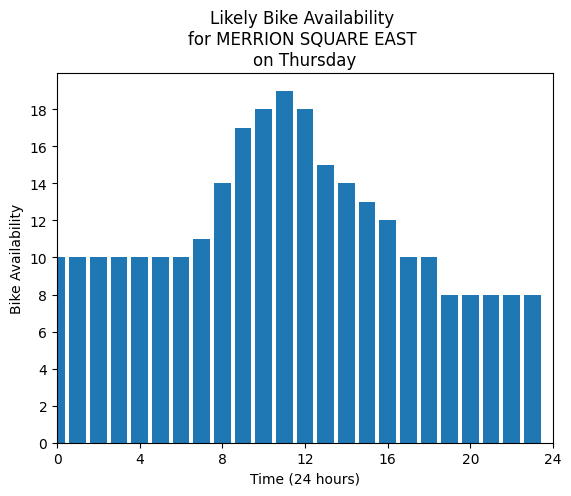

In [21]:
#Check Bike availability or Bike Parking Availability
req = 'b' #input("Do you want to check for Bike Availability (Type: b) or Parking Availability (Type: p): ")
if req == 'b' or req == 'B' or req == 'p' or req == 'P' or req == 'bike' or req == 'Bike' or req == 'park' or req == 'Park':

    #Month
    month_num = 3

    #Day of the week
    day_num = 5 #int(input("Enter Day Number (1 = Mon, 2 = Tues, 3 = Wed etc): "))
    
    #Hour
    hour_num = 12
    
    #Minute pass the hour
    #min_num = int(input("Enter Minute pass the hour (0 - 15 - 30 - 45): "))
    
    #Station ID
    stationid = 25 #int(input("Enter Station ID (1 to 117): "))

    try:
        stationname = df.loc[(df['number']==stationid),'name'].values[0]
        
        #Filter data based on certain input parameters
        df['station_select'] = (df['YEAR']==2023) & (df['MONTH']==month_num) & (df['Day_of_Week']==day_num-1) & (df['number']==stationid)
        
        ## Set up x- and y-axis of Plot
        x =df['HOUR'].loc[df['station_select']]

        if req == 'bike' or req == 'Bike' or req == 'b' or req == 'B':
            y = df['bike_available'].loc[df['station_select']]
            plt.ylabel("Bike Availability")
            plt.title(f'Likely Bike Availability \nfor {stationname} \non {convert_day(day_num-1)}')
            
        elif req == 'park' or req == 'Park' or req == 'p' or req == 'P':
            y = df['bike_stand_available'].loc[df['station_select']]
            plt.ylabel("Bike Parking Availability")
            plt.title(f'Likely Bike Parking Availability \nfor {stationname} \non {convert_day(day_num-1)}')
            print("OK")
       
        #Set Up Plot
        plt.xlabel("Time (24 hours)")
        ytick = np.array([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44])
        xtick = np.array([0,4,8,12,16,20,24])
        plt.xticks(xtick)
        plt.yticks(ytick)
        plt.xlim(0,24)
        plt.bar(x,y)
        plt.show()
    except:
        print ("Station ID Does not exist")
    
else:
    print("Incorrect Entry")

## Examine Weather Information

In [22]:
dfw["temp"] = dfw["temp"]-273.15
dfw["temp_feel"] = dfw["temp_feel"]-273.15
#dfw["wind_speed"].unique()
dfw["weather_main"].unique()

array(['Clouds', 'Rain', 'Snow', 'Clear', 'Drizzle'], dtype=object)

In [23]:
#Create new column putting numerical values to weather_main
dfw['weather_main'].replace(['Clouds', 'Rain','Snow','Clear','Drizzle'],[1, 2,3,4,5], inplace=True)
dfw["weather_main"].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [24]:
dfw['time_select'] = (dfw['Day_of_Week']==day_num-1) & (dfw['MONTH']==month_num) #& (dfw["HOUR_w"] == hour_num)


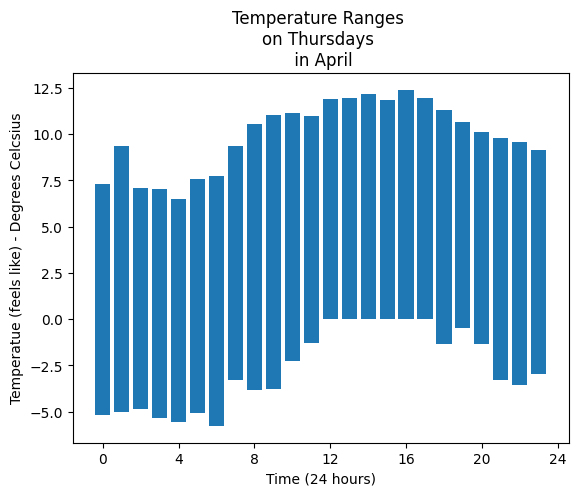

In [25]:
#Set X and Y plot
x =dfw['HOUR'].loc[dfw['time_select']]
y = dfw["temp_feel"].loc[dfw['time_select']]

#Create Plot
plt.title(f'Temperature Ranges \non {convert_day(day_num-1)}s \n in {convert_month(day_num-1)}')
plt.xlabel("Time (24 hours)")
plt.ylabel("Temperatue (feels like) - Degrees Celcsius")
#ytick = np.array([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44])
xtick = np.array([0,4,8,12,16,20,24])
plt.xticks(xtick)
#plt.yticks(ytick)
plt.bar(x,y)
plt.show()

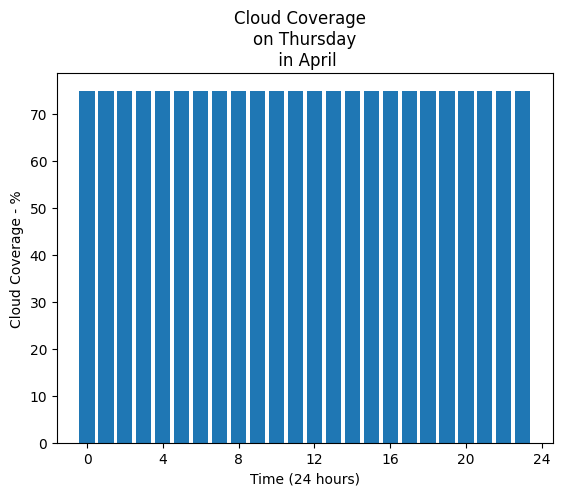

In [26]:
#Set X and Y plot
x =dfw['HOUR'].loc[dfw['time_select']]
y = dfw["clouds"].loc[dfw['time_select']]

#Create Plot
plt.title(f'Cloud Coverage  \non {convert_day(day_num-1)}\n in {convert_month(day_num-1)}')
plt.xlabel("Time (24 hours)")
plt.ylabel("Cloud Coverage - %")
ytick = np.array([0,10,20,30,40,50,60,70,80,90,100])
xtick = np.array([0,4,8,12,16,20,24])
plt.xticks(xtick)
plt.yticks(ytick)
#plt.xlim(0,24)
plt.bar(x,y)
plt.show()

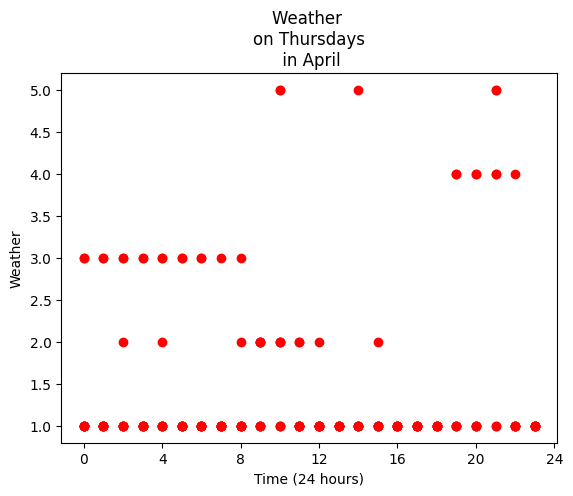

In [27]:
#Set X and Y plot
x =dfw['HOUR'].loc[dfw['time_select']]
y = dfw["weather_main"].loc[dfw['time_select']]

#Create Plot
plt.title(f'Weather \non {convert_day(day_num-1)}s\n in {convert_month(day_num-1)}')
plt.xlabel("Time (24 hours)")
plt.ylabel("Weather")
#ytick = np.array([0,10,20,30,40,50,60,70,80,90,100])
xtick = np.array([0,4,8,12,16,20,24])
plt.xticks(xtick)
#plt.yticks(ytick)
#plt.xlim(0,24)
plt.scatter(x,y,color='red')
plt.show()

## Combine the two dataframes

In [28]:
dfbikeweath = df.merge(dfw, on="TIME")
dfbikeweath.shape

(24101, 42)

In [29]:
df.shape,dfw.shape

((723761, 21), (1061, 22))

In [30]:
dfbikeweath.describe().T

,count,mean,std,min,25%,50%,75%,max
#,24101.0,363190.482636,209997.101938,61.0000,182043.0000,363096.0000,546956.0000,723711.0000
number,24101.0,60.412638,43.290873,1.0000,29.0000,59.0000,89.0000,507.0000
bike_stand,24101.0,31.872287,7.666679,1.0000,29.0000,30.0000,40.0000,40.0000
bike_stand_available,24101.0,19.742500,11.080127,0.0000,11.0000,20.0000,28.0000,40.0000
bike_available,24101.0,11.739596,9.691588,0.0000,4.0000,10.0000,18.0000,40.0000
delete_flag_x,24101.0,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000
YEAR_x,24101.0,2023.000000,0.000000,2023.0000,2023.0000,2023.0000,2023.0000,2023.0000
MONTH_x,24101.0,3.000000,0.000000,3.0000,3.0000,3.0000,3.0000,3.0000
Day_of_Week_x,24101.0,2.956807,1.920819,0.0000,1.0000,3.0000,5.0000,6.0000
DAY_num_x,24101.0,12.481059,6.487852,2.0000,6.0000,12.0000,18.0000,24.0000


In [31]:
dfbikeweath.head()

,#,id_x,number,name,address,bike_stand,bike_stand_available,bike_available,status,last_update,...,creat_time_y,delete_flag_y,YEAR_y,MONTH_y,Day_of_Week_y,DAY_num_y,HOUR_y,MINUTE_y,DAY_y,time_select
0,61,0005a69485fd4846,20,JAMES STREET EAST,James Street East,30,30,0,OPEN,09/03/2023 19:18,...,09/03/2023 19:27,0,2023,3,3,9,19,27,Thu,False
1,6889,027c49405f914f96,68,HANOVER QUAY,Hanover Quay,40,40,0,OPEN,09/03/2023 19:22,...,09/03/2023 19:27,0,2023,3,3,9,19,27,Thu,False
2,33285,0bd9a84689594421,38,TALBOT STREET,Talbot Street,40,22,18,OPEN,09/03/2023 19:19,...,09/03/2023 19:27,0,2023,3,3,9,19,27,Thu,False
3,33328,0bdeaea16e64492d,51,YORK STREET WEST,York Street West,40,37,3,OPEN,09/03/2023 19:21,...,09/03/2023 19:27,0,2023,3,3,9,19,27,Thu,False
4,37570,0d5eb714cf404ebc,93,HEUSTON STATION (CENTRAL),Heuston Station (Central),40,10,30,OPEN,09/03/2023 19:19,...,09/03/2023 19:27,0,2023,3,3,9,19,27,Thu,False


## Check if any missing values (NaN)

In [32]:
dfbikeweath.isna().sum().sum()

0

## Drop some of the unwanted columns 

In [33]:
dfbikeweath.drop(labels=['delete_flag_y','id_x','delete_flag_x','address','status','last_update','coord_lon','coord_lat','#'],axis=1,inplace=True)

In [34]:
dfbikeweath.dtypes

number                           int64
name                            object
bike_stand                       int64
bike_stand_available             int64
bike_available                   int64
creat_time_x                    object
TIME                    datetime64[ns]
YEAR_x                           int64
MONTH_x                          int64
Day_of_Week_x                    int64
DAY_num_x                        int64
HOUR_x                           int64
MINUTE_x                         int64
DAY_x                           object
station_select                    bool
id_y                            object
weather_id                       int64
weather_main                     int64
temp                           float64
temp_feel                      float64
wind_speed                     float64
clouds                           int64
sunrise                 datetime64[ns]
sunset                  datetime64[ns]
creat_time_y                    object
YEAR_y                   

## Split Data set to Train and Test

In [35]:
train_set,test_set = train_test_split(dfbikeweath,test_size=0.2,random_state=42)
train_set.shape,test_set.shape

((19280, 33), (4821, 33))

## Create a copy of Training set to carry out some preliminary analysis 

In [36]:
bikes = train_set.copy()
bikes.dtypes

number                           int64
name                            object
bike_stand                       int64
bike_stand_available             int64
bike_available                   int64
creat_time_x                    object
TIME                    datetime64[ns]
YEAR_x                           int64
MONTH_x                          int64
Day_of_Week_x                    int64
DAY_num_x                        int64
HOUR_x                           int64
MINUTE_x                         int64
DAY_x                           object
station_select                    bool
id_y                            object
weather_id                       int64
weather_main                     int64
temp                           float64
temp_feel                      float64
wind_speed                     float64
clouds                           int64
sunrise                 datetime64[ns]
sunset                  datetime64[ns]
creat_time_y                    object
YEAR_y                   

In [37]:
corr_matrix = bikes.corr()

C:\Users\corma\AppData\Local\Temp\ipykernel_12296\295380.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = bikes.corr()


In [38]:
corr_matrix['bike_available'].sort_values(ascending = False)

bike_available          1.000000
bike_stand              0.228699
number                  0.029923
Day_of_Week_y           0.017747
Day_of_Week_x           0.017747
weather_main            0.016580
clouds                  0.014740
time_select             0.007737
MINUTE_x               -0.004738
MINUTE_y               -0.004738
wind_speed             -0.007683
HOUR_x                 -0.011705
HOUR_y                 -0.011705
DAY_num_x              -0.015629
DAY_num_y              -0.015629
weather_id             -0.015822
temp_feel              -0.017851
temp                   -0.018268
station_select         -0.026008
bike_stand_available   -0.686021
YEAR_x                       NaN
MONTH_x                      NaN
YEAR_y                       NaN
MONTH_y                      NaN
Name: bike_available, dtype: float64

## Correlation based on weather

In [39]:
bikes[['bike_available','weather_main','clouds','wind_speed','weather_id','temp_feel','temp']].corr()

,bike_available,weather_main,clouds,wind_speed,weather_id,temp_feel,temp
bike_available,1.000000,0.016580,0.014740,-0.007683,-0.015822,-0.017851,-0.018268
weather_main,0.016580,1.000000,0.221045,0.018268,-0.893304,-0.206920,-0.198771
clouds,0.014740,0.221045,1.000000,0.020678,-0.253018,0.009980,-0.017001
wind_speed,-0.007683,0.018268,0.020678,1.000000,-0.081389,0.212743,0.400228
weather_id,-0.015822,-0.893304,-0.253018,-0.081389,1.000000,0.231458,0.215783
temp_feel,-0.017851,-0.206920,0.009980,0.212743,0.231458,1.000000,0.967575
temp,-0.018268,-0.198771,-0.017001,0.400228,0.215783,0.967575,1.000000


<Axes: xlabel='temp', ylabel='bike_available'>

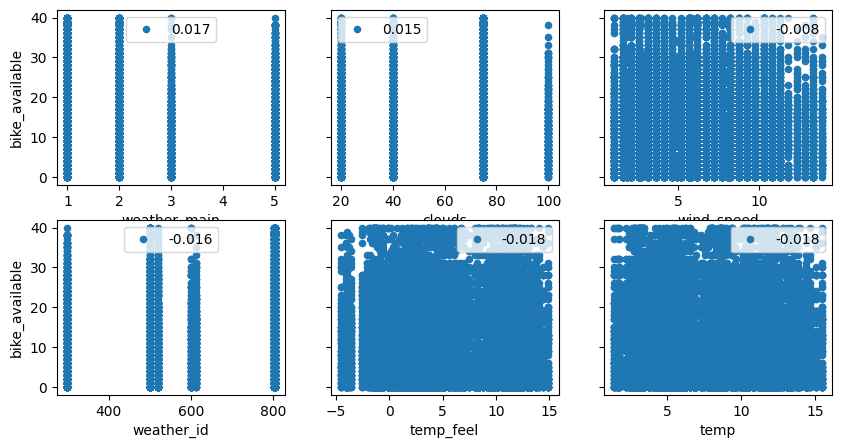

In [40]:
fig, axs = plt.subplots(2, 3, sharey=True)
bikes.plot(kind='scatter', x='weather_main', y='bike_available', label="%.3f" % bikes[['weather_main', 'bike_available']].corr().to_numpy()[0,1], ax=axs[0][0], figsize=(10, 5))
bikes.plot(kind='scatter', x='clouds', y='bike_available', label="%.3f" % bikes[['clouds', 'bike_available']].corr().to_numpy()[0,1], ax=axs[0][1])
bikes.plot(kind='scatter', x='wind_speed', y='bike_available', label="%.3f" % bikes[['wind_speed', 'bike_available']].corr().to_numpy()[0,1], ax=axs[0][2])
bikes.plot(kind='scatter', x='weather_id', y='bike_available', label="%.3f" % bikes[['weather_id', 'bike_available']].corr().to_numpy()[0,1], ax=axs[1][0])
bikes.plot(kind='scatter', x='temp_feel', y='bike_available', label="%.3f" % bikes[['temp_feel', 'bike_available']].corr().to_numpy()[0,1], ax=axs[1][1])
bikes.plot(kind='scatter', x='temp', y='bike_available', label="%.3f" % bikes[['temp', 'bike_available']].corr().to_numpy()[0,1], ax=axs[1][2])

## Correlation based on time

In [41]:
bikes[['bike_available','HOUR_x','DAY_num_x','MINUTE_x','Day_of_Week_x']].corr()

,bike_available,HOUR_x,DAY_num_x,MINUTE_x,Day_of_Week_x
bike_available,1.000000,-0.011705,-0.015629,-0.004738,0.017747
HOUR_x,-0.011705,1.000000,-0.151850,0.039567,0.067695
DAY_num_x,-0.015629,-0.151850,1.000000,-0.120986,-0.091672
MINUTE_x,-0.004738,0.039567,-0.120986,1.000000,-0.020108
Day_of_Week_x,0.017747,0.067695,-0.091672,-0.020108,1.000000


<Axes: xlabel='Day_of_Week_x', ylabel='bike_available'>

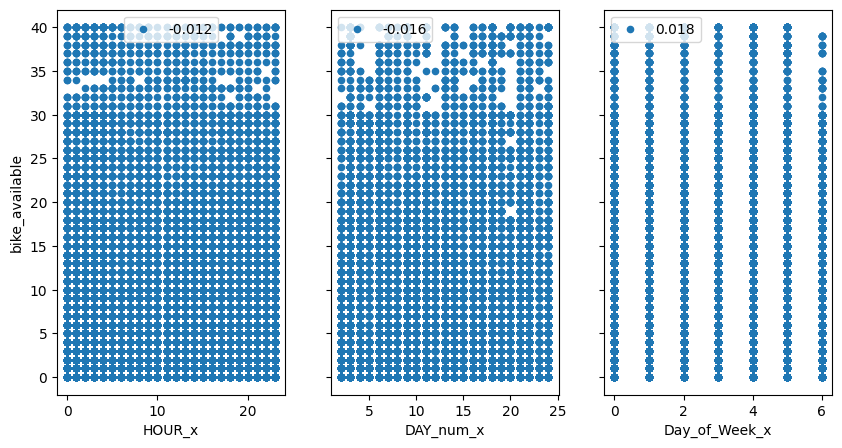

In [42]:
fig, axs = plt.subplots(1, 3, sharey=True)
bikes.plot(kind='scatter', x='HOUR_x', y='bike_available', label="%.3f" % bikes[['HOUR_x', 'bike_available']].corr().to_numpy()[0,1], ax=axs[0], figsize=(10, 5))
bikes.plot(kind='scatter', x='DAY_num_x', y='bike_available', label="%.3f" % bikes[['DAY_num_x', 'bike_available']].corr().to_numpy()[0,1], ax=axs[1], figsize=(10, 5))
bikes.plot(kind='scatter', x='Day_of_Week_x', y='bike_available', label="%.3f" % bikes[['Day_of_Week_x', 'bike_available']].corr().to_numpy()[0,1], ax=axs[2], figsize=(10, 5))

## Prepare Linear Regression inputs 

In [93]:
feature = 'weather_id'
X = bikes[[feature]]
y = bikes['bike_available']

linreg = LinearRegression()
linreg.fit(X, y)
          
# Print the estimated linear regression coefficients.
print("\nIntercept: \n", linreg.intercept_)
print("Features: \n", features)
print("Coeficients: \n", linreg.coef_)


Intercept: 
 12.43813934335738
Features: 
 ['weather_id']
Coeficients: 
 [-0.00098358]


## Test the model - Linear Regression

In [94]:
# Predicted scores for each example. 
linreg_predictions = linreg.predict(X[[f]]).round(0)
print(f"\nPrediction: ({f}, Bike Availability, Predicted Bike Availability): {int(X[f].values[0])} , {y.values[0]} , {int(linreg_predictions[0])}")
actual_vs_predicted = pd.concat([y, pd.DataFrame(linreg_predictions, columns=['Predicted'], index=y.index)], axis=1)
actual_vs_predicted


Prediction: (weather_id, Bike Availability, Predicted Bike Availability): 803 , 5 , 12


,bike_available,Predicted
23335,5,12.0
16352,8,12.0
15783,2,12.0
22652,3,12.0
5384,27,12.0
...,...,...
21575,24,12.0
5390,0,12.0
860,15,12.0
15795,10,12.0


## Predict bike availabity for selected feature

In [73]:
X_new = pd.DataFrame({f: [1]})
X_new.head()
linreg.predict(X_new)

array([12.43715576])

<Axes: xlabel='weather_id', ylabel='bike_available'>

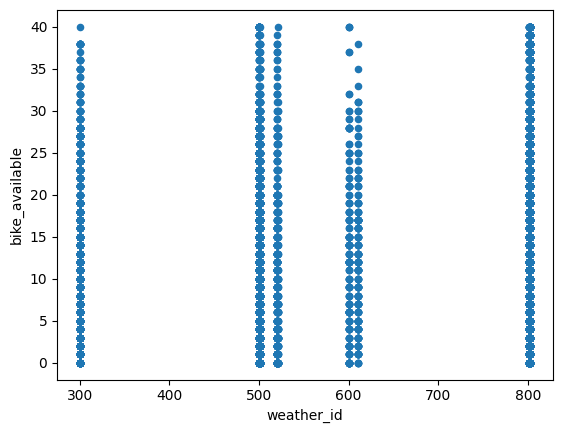

In [74]:
bikes.plot(kind='scatter', x=f, y='bike_available')

## Multiple Regression 

In [96]:
features = ['weather_main','clouds','temp', 'weather_id', 'wind_speed',]
X = bikes[features]
y = bikes['bike_available']

#X =bikes[mul_features]
linreg_m = LinearRegression()
linreg_m.fit(X[mul_features], y)

# Print the estimated linear regression coefficients.
print("\nIntercept: \n", linreg_m.intercept_)
print("Features: \n", features)
print("Coeficients: \n", linreg_m.coef_)


Intercept: 
 11.421996643257462
Features: 
 ['weather_main', 'clouds', 'temp', 'weather_id', 'wind_speed']
Coeficients: 
 [ 1.16141715e-01  6.88728148e-03 -4.06542801e-02  3.25628403e-05
 -6.76867620e-03]


# Test the model - Multiple Regression

In [97]:
# Predicted scores for each example. 
linreg_m_predictions = linreg_m.predict(X[['weather_main','clouds','temp', 'weather_id', 'wind_speed']]).round(0)

#print("Predicted scores:", predicted_scores)
print("\nPrediction: (Temp - Wind Speed - Clouds - Weather ID - Weather, Bike Availability, PredictedScore)")
actual_vs_predicted_m = pd.concat([y, pd.DataFrame(linreg_m_predictions, columns=['Predicted'], index=y.index)], axis=1)
actual_vs_predicted_m


Prediction: (Temp - Wind Speed - Clouds - Weather ID - Weather, Bike Availability, PredictedScore)


,bike_available,Predicted
23335,5,12.0
16352,8,12.0
15783,2,11.0
22652,3,12.0
5384,27,12.0
...,...,...
21575,24,12.0
5390,0,12.0
860,15,12.0
15795,10,11.0


## Model based on Decision Tree Regressor 

In [102]:
features = ['weather_main','clouds','temp', 'weather_id', 'wind_speed',]
X = bikes[features]
y = bikes['bike_available']

treereg = DecisionTreeRegressor()
treereg.fit(X, y)

# Print the estimated linear regression coefficients.
#print("\nIntercept: \n", treereg.intercept_)
#print("Features: \n", features)
#print("Coeficients: \n", treereg.coef_)

DecisionTreeRegressor()